# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing DataFrames

In [2]:
Customers = pd.read_csv(r'C:\Users\m9wrc\OneDrive\Desktop\New Begining\Product Strategy Team In Banking Domain\Data Dump\dim_customers.csv')
Spends = pd.read_csv(r'C:\Users\m9wrc\OneDrive\Desktop\New Begining\Product Strategy Team In Banking Domain\Data Dump\fact_spends.csv')

# EDA & Data Munging

## Defining function to summarize DataFrames 

In [3]:
def summarize_table(df):
    rows, columns = df.shape
    print(f'''\033[1mTable Shape:''')
    print(f'''\033[1mRows: \033[0m{rows}''')
    print(f'''\033[1mColumns: \033[0m{columns}''')
    print(f'\n')
    print(f'''\033[1mColumn Names: \033[0m''')
    for columns in df.columns:
        print(columns, end = ' | ')
    print('\n')
    print(f'''\033[1mTable info : \033[0m''')
    df.info()
    print('\n')
    print(f'''\033[1mStatistical info of Table : \033[0m''')
    print(df.describe())
    print('\n')
    print(f'''\033[1mColumn Description : \033[0m''')
    print(df.describe(include = 'object'))
    print('\n')
    print(f'''\033[1mCount of unique values in each column : \033[0m''')
    for column in df.columns:
        unique_values = df[column].nunique()
        print(f'''\033[1m{column} : \033[0m {unique_values}''')
    print('\n')
    print(f'''\033[1mCount of null values in each column : \033[0m''')
    for column in df.columns:
        null_values = df[column].isnull().sum()
        print(f'''\033[1m{column} : \033[0m {null_values}''')

## Customers Table Summary

In [4]:
summarize_table(Customers)

Table Shape:
Rows: 4000
Columns: 7


Column Names: 
customer_id | age_group | city | occupation | gender | marital status | avg_income | 

Table info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


Statistical info of Table : 
         avg_income
count   4000.000000
mean   51657.032250
std    14690.140645
min    24816.000000
25%    38701.000000
50%    50422.000000
75%    64773.250000
max    86600.000000


Column Description : 
       customer_id age_group    city             occupatio

In [5]:
Customers = Customers.rename(columns = {"marital status" : 'marital_status'})
Customers.head(3)

,customer_id,age_group,city,occupation,gender,marital_status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702


In [6]:
print (f"\033[1mTotal Customers : \033[0m {Customers.customer_id.count()}")
print('\n')
print (f"\033[1mTotal Customers by gender : \n\033[0m {Customers.groupby('gender').customer_id.count().reset_index().to_string(index = False)}")
print('\n')
print (f"\033[1mTotal Customers by age group : \n\033[0m {Customers.groupby('age_group').customer_id.count().reset_index().to_string(index = False)}")
print('\n')
print (f"\033[1mTotal Customers by City : \n\033[0m {Customers.groupby('city').customer_id.count().reset_index().to_string(index = False)}")
print('\n')
print (f"\033[1mTotal Customers by Occupation : \n\033[0m {Customers.groupby('occupation').customer_id.count().reset_index().to_string(index = False)}")
print('\n')
print (f"\033[1mTotal Customers by marital status: \n\033[0m {Customers.groupby('marital_status').customer_id.count().reset_index().to_string(index = False)}")

Total Customers :  4000


Total Customers by gender : 
 gender  customer_id
Female         1403
  Male         2597


Total Customers by age group : 
 age_group  customer_id
    21-24          691
    25-34         1498
    35-45         1273
      45+          538


Total Customers by City : 
      city  customer_id
Bengaluru          751
  Chennai          834
Delhi NCR          744
Hyderabad          593
   Mumbai         1078


Total Customers by Occupation : 
               occupation  customer_id
         Business Owners          630
             Freelancers          784
    Government Employees          399
   Salaried IT Employees         1294
Salaried Other Employees          893


Total Customers by marital status: 
 marital_status  customer_id
       Married         3136
        Single          864


## Spends Table Summary

In [7]:
summarize_table(Spends)

Table Shape:
Rows: 864000
Columns: 5


Column Names: 
customer_id | month | category | payment_type | spend | 

Table info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


Statistical info of Table : 
               spend
count  864000.000000
mean      614.464994
std       661.571676
min         6.000000
25%       191.000000
50%       395.000000
75%       793.000000
max     10313.000000


Column Description : 
       customer_id   month           category payment_type
count       864000  864000             864000       864000
unique        4000       6                  9     

In [8]:
print(f"\033[1mUnique Months : \n\033[0m {Spends.month.unique()}")
print('\n')
print (f"\033[1mUniqe Categories : \n\033[0m {Spends.category.unique()}")
print('\n')
print (f"\033[1mUniqe Payment Types : \n\033[0m {Spends.payment_type.unique()}")

Unique Months : 
 ['July' 'October' 'May' 'September' 'June' 'August']


Uniqe Categories : 
 ['Health & Wellness' 'Groceries' 'Electronics' 'Bills' 'Entertainment'
 'Apparel' 'Food' 'Others' 'Travel']


Uniqe Payment Types : 
 ['Credit Card' 'UPI' 'Debit Card' 'Net Banking']


## Merging customers table and spends table for analysis

In [9]:
customer_spend = Customers.merge(Spends, on = 'customer_id')

In [10]:
customer_spend.head(10)

,customer_id,age_group,city,occupation,gender,...,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,May,Food,Debit Card,334
5,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,October,Bills,Net Banking,1031
6,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,June,Groceries,Net Banking,1048
7,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,September,Health & Wellness,UPI,922
8,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,June,Apparel,UPI,131
9,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,...,73523,August,Apparel,UPI,262


In [11]:
avg_total_income = round(Customers.avg_income.sum()/ 1000000, 2)
print (f"\033[1mAverage Total Income : \033[0m {avg_total_income}M")

avg_total_spend = round((customer_spend.spend.sum() / customer_spend.month.nunique()) / 1000000, 2)
print (f"\033[1mAverage Total Spend : \033[0m {avg_total_spend}M")

income_utilization = round(((avg_total_spend / avg_total_income) * 100), 2)
print (f"\033[1mIncome Utilization : \033[0m {income_utilization}%")

Average Total Income :  206.63M
Average Total Spend :  88.48M
Income Utilization :  42.82%


In [12]:
avg_total_income = round(Customers.query("gender == 'Male'").avg_income.sum()/ 1000000, 2)
print (f"\033[1mAverage Total Income (Male Customers): \033[0m {avg_total_income}M")

avg_total_spend = round((customer_spend.query("gender == 'Male'").spend.sum() / Spends.month.nunique()) / 1000000, 2)
print (f"\033[1mAverage Total Spend (Male Customers): \033[0m {avg_total_spend}M")

income_utilization = round(((avg_total_spend / avg_total_income) * 100), 2)
print (f"\033[1mIncome Utilization (Male Customers): \033[0m {income_utilization}%")

Average Total Income (Male Customers):  134.09M
Average Total Spend (Male Customers):  59.52M
Income Utilization (Male Customers):  44.39%


In [13]:
avg_total_income = round(Customers.query("gender == 'Female'").avg_income.sum()/ 1000000, 2)
print (f"\033[1mAverage Total Income (Male Customers): \033[0m {avg_total_income}M")

avg_total_spend = round((customer_spend.query("gender == 'Female'").spend.sum() / Spends.month.nunique()) / 1000000, 2)
print (f"\033[1mAverage Total Spend (Male Customers): \033[0m {avg_total_spend}M")

income_utilization = round(((avg_total_spend / avg_total_income) * 100), 2)
print (f"\033[1mIncome Utilization (Male Customers): \033[0m {income_utilization}%")

Average Total Income (Male Customers):  72.54M
Average Total Spend (Male Customers):  28.96M
Income Utilization (Male Customers):  39.92%


In [14]:
total_spend = round(customer_spend.spend.sum()/ 1000000, 2)
print (f"\033[1mTotal Spend : \033[0m {total_spend}M")

total_spend_using_CC = round(customer_spend.query("payment_type == 'Credit Card'").spend.sum() / 1000000, 2)
print (f"\033[1mTotal Spend (Using CC) : \033[0m {total_spend_using_CC}M")

cc_utilization = round(((total_spend_using_CC / total_spend) * 100), 2)
print (f"\033[1mCredit Card Utilization : \033[0m {cc_utilization}%")

Total Spend :  530.9M
Total Spend (Using CC) :  216.31M
Credit Card Utilization :  40.74%


In [15]:
total_spend_male = round(customer_spend.query("gender == 'Male'").spend.sum()/ 1000000, 2)
print (f"\033[1mTotal Spend : \033[0m {total_spend_male}M")

total_spend_using_CC_male = round(customer_spend.query("gender == 'Male' & payment_type == 'Credit Card'").spend.sum() / 1000000, 2)
print (f"\033[1mTotal Spend (Using CC) : \033[0m {total_spend_using_CC_male}M")

cc_utilization = round(((total_spend_using_CC_male / total_spend_male) * 100), 2)
print (f"\033[1mCredit Card Utilization% (Male) : \033[0m {cc_utilization}%")

Total Spend :  357.14M
Total Spend (Using CC) :  144.2M
Credit Card Utilization% (Male) :  40.38%


In [16]:
total_spend_female = round(customer_spend.query("gender == 'Female'").spend.sum()/ 1000000, 2)
print (f"\033[1mTotal Spend : \033[0m {total_spend_female}M")

total_spend_using_CC_female = round(customer_spend.query("gender == 'Female' & payment_type == 'Credit Card'").spend.sum() / 1000000, 2)
print (f"\033[1mTotal Spend (Using CC) : \033[0m {total_spend_using_CC_female}M")

cc_utilization = round(((total_spend_using_CC_female / total_spend_female) * 100), 2)
print (f"\033[1mCredit Card Utilization (Female) : \033[0m {cc_utilization}%")

Total Spend :  173.76M
Total Spend (Using CC) :  72.11M
Credit Card Utilization (Female) :  41.5%


In [17]:
customer_spend_using_CC = customer_spend.query("payment_type == 'Credit Card'").reset_index()

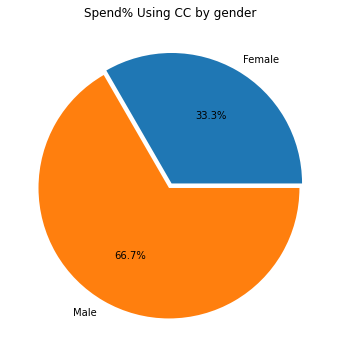

In [18]:
cc_spend_by_gender = customer_spend_using_CC.groupby('gender').spend.sum().reset_index()

plt.figure(figsize = (6,6))
plt.pie(cc_spend_by_gender['spend'], labels = cc_spend_by_gender['gender'], autopct = '%0.1f%%', explode = [.02, .02])
plt.title("Spend% Using CC by gender")
plt.show()

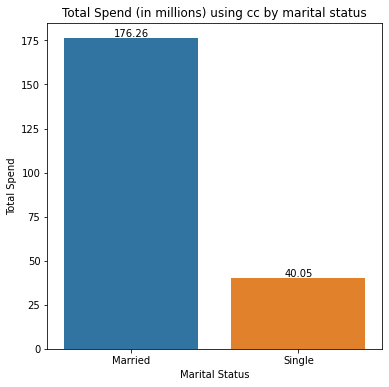

In [19]:
cc_spend_by_marital_status = customer_spend_using_CC.groupby('marital_status').spend.sum().reset_index()
cc_spend_by_marital_status.spend = round(cc_spend_by_marital_status.spend / 1000000, 2)

plt.figure(figsize = (6,6))
sns.barplot(y = cc_spend_by_marital_status['spend'], x = cc_spend_by_marital_status['marital_status'])
plt.title("Total Spend (in millions) using cc by marital status")
for i, v in enumerate(cc_spend_by_marital_status['spend']):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')
plt.xlabel('Marital Status')
plt.ylabel('Total Spend')
plt.show()

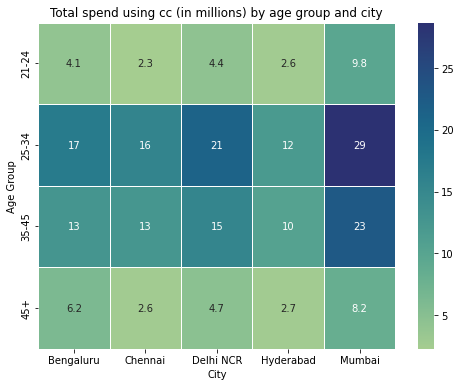

In [20]:
spend_age_group_city = customer_spend_using_CC.groupby(['age_group', 'city']).spend.sum().reset_index()
spend_age_group_city.spend = round(spend_age_group_city.spend/ 1000000, 2)
spend_age_group_city = spend_age_group_city.pivot(index = 'age_group', columns = 'city', values = 'spend')

plt.figure(figsize = (8,6))
sns.heatmap(spend_age_group_city, annot = True, fmt = '.2g', linewidth = .5, cmap = 'crest')
plt.xlabel("City")
plt.ylabel("Age Group")
plt.title("Total spend using cc (in millions) by age group and city")
plt.show()

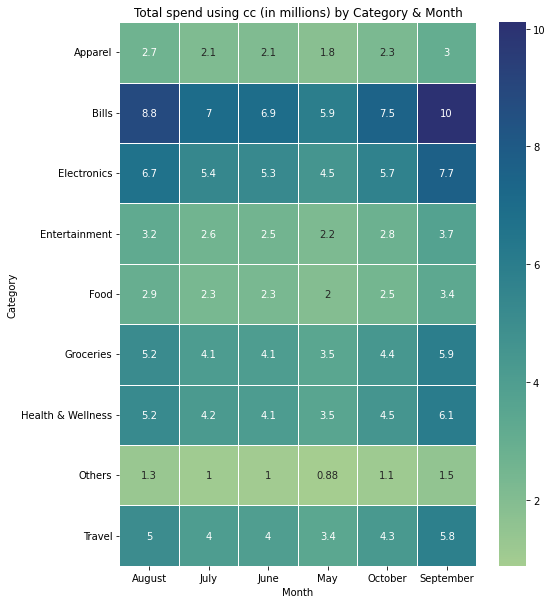

In [21]:
spend_category_month = customer_spend_using_CC.groupby(['category', 'month']).spend.sum().reset_index()
spend_category_month.spend = round(spend_category_month.spend/ 1000000, 2)
spend_category_month = spend_category_month.pivot(index = 'category', columns = 'month', values = 'spend')

plt.figure(figsize = (8,10))
sns.heatmap(spend_category_month, annot = True, fmt = '.2g', linewidth = .5, cmap = 'crest')
plt.xlabel("Month")
plt.ylabel("Category")
plt.title("Total spend using cc (in millions) by Category & Month")
plt.show()